# Level Set Tree with the two moons

## Constructing the level set tree

In [5]:
from sklearn.datasets import make_moons
import debacl as dcl
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from PIL import Image
import numpy as np
from numpy import *
from sklearn import preprocessing as prep
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import sklearn.cross_validation as crval
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import fetch_mldata
from scipy.interpolate import interp1d
from sklearn.svm import LinearSVC
import pylab
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.mixture import GMM
from sklearn.neighbors import KernelDensity
import csv

X=[]
with open('X_tr.csv','r') as f:
    reader = csv.reader(f)
    for row1 in reader:
        X.append(row1)
print size(X)

X=np.asarray(X)
print X[0,:]

X=X.astype(np.float)


X=np.ravel(X)
X= X.reshape(5000, 14)
print(shape(X))

selX=X

selX_scaled=X
std_scal=prep.StandardScaler()
selX_scaled=std_scal.fit_transform(selX)
print('it had mean: ' +str(mean(selX))+' and std:'+ str(std(selX)))
print('NOW it has mean: '+str(mean(selX_scaled))+' and std: '+str(std(selX_scaled)))


import matplotlib.pyplot as plt
plt.style.use('grayscale')
%matplotlib notebook

Automatically created module for IPython interactive environment
70000
['0.11515' '1.5813' '0.62853' '-3.1255' '0.8644' '0.56255' '-4.7037'
 '0.76546' '-0.43798' '1' '0.80504' '0.97626' '0' '1']
(5000, 14)
it had mean: 0.189320838757 and std:2.26790120867
NOW it has mean: -2.27373675443e-17 and std: 1.0


In [6]:
#X, label = make_moons(n_samples=200, noise=0.1, random_state=19)
X=selX_scaled

In [7]:
tree = dcl.construct_tree(X, k=13, prune_threshold=10,
                          verbose=True)
print tree

+-----+-------------+-----------+------------+----------+------+--------+------------+
|  id | start_level | end_level | start_mass | end_mass | size | parent |  children  |
+-----+-------------+-----------+------------+----------+------+--------+------------+
|  0  |    0.000    |   0.000   |   0.000    |  0.007   | 5000 |  None  |   [1, 2]   |
|  1  |    0.000    |   0.000   |   0.007    |  0.059   | 2280 |   0    |  [13, 14]  |
|  2  |    0.000    |   0.000   |   0.007    |  0.008   | 2687 |   0    |   [3, 4]   |
|  3  |    0.000    |   0.000   |   0.008    |  0.057   | 2239 |   2    |  [11, 12]  |
|  4  |    0.000    |   0.000   |   0.008    |  0.013   | 444  |   2    |   [5, 6]   |
|  5  |    0.000    |   0.000   |   0.013    |  0.055   | 240  |   4    |  [9, 10]   |
|  6  |    0.000    |   0.000   |   0.013    |  0.051   | 198  |   4    |   [7, 8]   |
|  7  |    0.000    |   0.001   |   0.051    |  0.457   | 129  |   6    |     []     |
|  8  |    0.000    |   0.000   |   0.051  

<IPython.core.display.Javascript object>


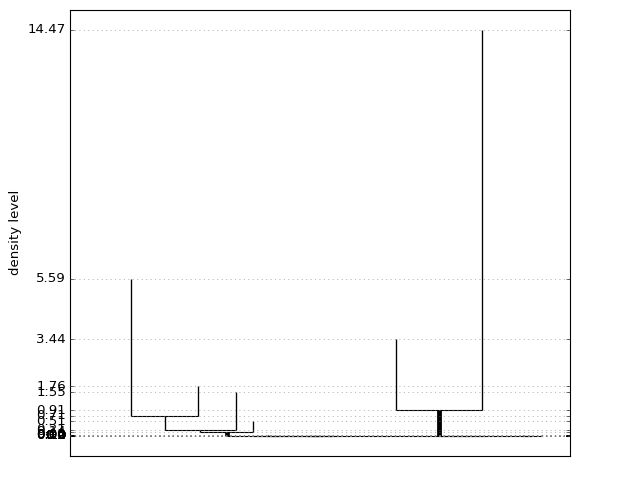

In [8]:
fig = tree.plot(form='density')[0]
fig.show()

## Retrieving the clusters

In [9]:
labels = tree.get_clusters(method='leaf', 
                           fill_background=False)
labels[:5]

array([[4613,    7],
       [4102,    7],
       [4615,    7],
       [   8,    7],
       [1035,    7]])

<IPython.core.display.Javascript object>


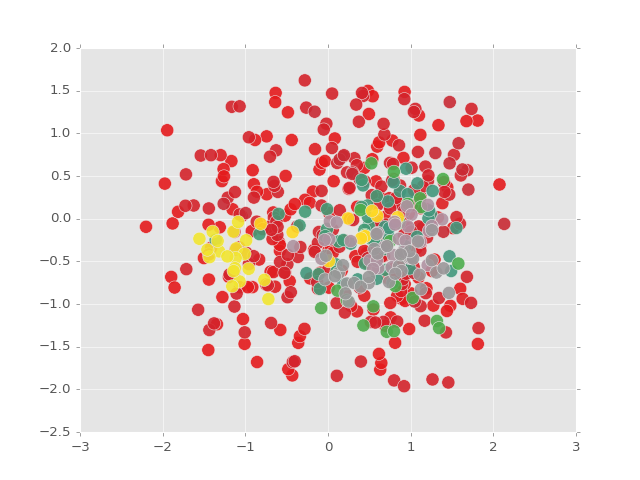

In [10]:
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots()
    
    ax.scatter(X[labels[:,0], 0], X[labels[:,0], 1],
               c=labels[:,1], s=140, alpha=0.9,
               cmap=plt.cm.Set1)
    fig.show()

In [11]:
import numpy as np
leaf_nodes = np.unique(labels[:, 1])

plot = tree.plot(form='density', color_nodes=leaf_nodes,
                 colormap='Set1')
fig = plot[0]
fig.show()

TypeError: The 'color_nodes' parameter must be a list.

## Identifying outliers

In [8]:
labels2 = tree.get_clusters(method='upper-level-set', threshold=0.05,
                            form='mass')

outliers = list(set(range(len(X))).difference(labels2[:, 0]))
outliers

[3, 132, 5, 135, 74, 27, 186, 99, 100, 58]

<IPython.core.display.Javascript object>


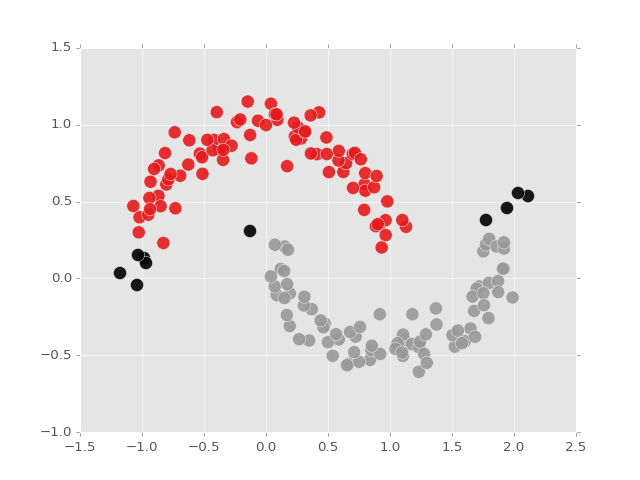

In [9]:
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots()
    
    ax.scatter(X[labels[:,0], 0], X[labels[:,0], 1], 
               c=labels[:,1], s=140, alpha=0.9,
               cmap=plt.cm.Set1)
    
    ax.scatter(X[outliers, 0], X[outliers, 1], c='black', s=140,
               alpha=0.9)
    fig.show()